In [1]:
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_DA_US= df[(df['job_title_short']== 'Data Analyst')& (df['job_country']== 'United States')]

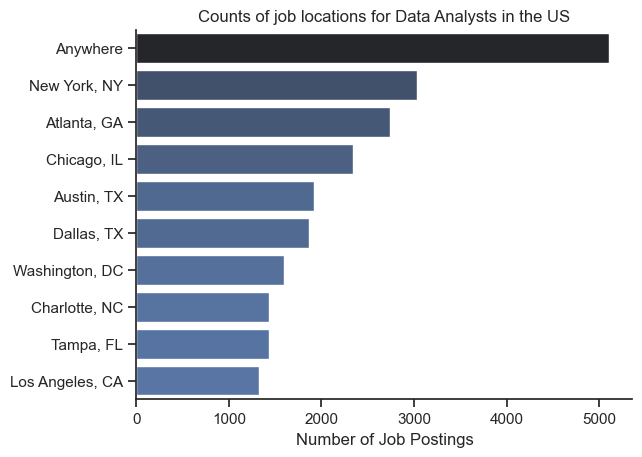

In [3]:
df_plot= df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location',hue= 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of job locations for Data Analysts in the US')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


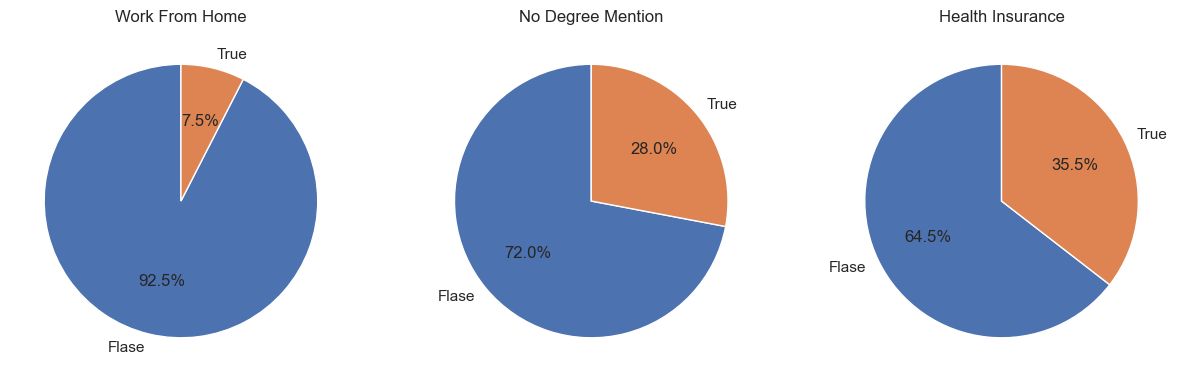

In [4]:
fig,ax= plt.subplots(1,3)
fig.set_size_inches(15,5)
dict_form={ 'job_work_from_home': 'Work From Home',
  'job_no_degree_mention': 'No Degree Mention',
   'job_health_insurance': 'Health Insurance'}

for i, (column,title) in enumerate(dict_form.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%',labels=['Flase','True'])
    ax[i].set_title(title)

plt.show()

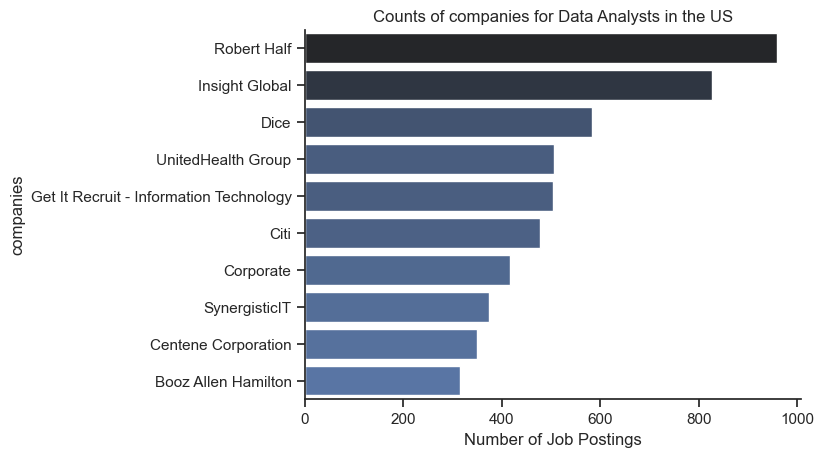

In [8]:
df_plot= df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name',hue= 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of companies for Data Analysts in the US')
plt.xlabel('Number of Job Postings')
plt.ylabel('companies')
plt.show()